In [9]:
import pandas as pd
import numpy as np

In [10]:
!pip install pandas
!pip install numpy


Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: reportbug 7.5.3-deb10u1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of reportbug or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: reportbug 7.5.3-deb10u1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of reportbug or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [11]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: reportbug 7.5.3-deb10u1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of reportbug or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [12]:
!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: reportbug 7.5.3-deb10u1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of reportbug or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [13]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: reportbug 7.5.3-deb10u1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of reportbug or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [14]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [16]:
improved_df = pd.read_csv(r'/home/ynoureddine/DSTI/DSTI-Project-Machine-Learning-with-Python-Labs/Yosr Solution/DB/improved_dataset.csv')


In [17]:
improved_df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,book_id,country_code,author_mean_rates,genres
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,1,US,4.46300,"['fantasy, paranormal', 'young-adult', 'fictio..."
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2,US,4.46300,"['fantasy, paranormal', 'children', 'fiction',..."
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,4,US,4.44000,"['fantasy, paranormal', 'young-adult', 'fictio..."
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,5,US,4.46300,"['fiction', 'children', 'fantasy, paranormal',..."
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,8,US,4.46300,"['fantasy, paranormal', 'young-adult', 'fictio..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9284,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press,45631,US,4.07112,"['fiction', 'non-fiction', 'history, historica..."
9285,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books,45633,US,4.08000,"['fiction', 'fantasy, paranormal']"
9286,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books,45634,US,4.08000,"['fiction', 'history, historical fiction, biog..."
9287,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco,45639,US,4.08000,"['non-fiction', 'history, historical fiction, ..."


In [18]:
improved_df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'book_id', 'country_code',
       'author_mean_rates', 'genres'],
      dtype='object')

In [19]:
improved_df['country_code'] = improved_df['country_code'].astype('category')


In [20]:
#categorize date column otherwise we cant use it for the training
# Convert 'date_column' to datetime type if it's not already
improved_df['publication_date'] = pd.to_datetime(improved_df['publication_date'], errors='coerce')



In [21]:
# Extract relevant components
improved_df['year'] = improved_df['publication_date'].dt.year
improved_df['month'] = improved_df['publication_date'].dt.month
improved_df['day'] = improved_df['publication_date'].dt.day

In [ ]:
# Save the DataFrame to a CSV file
improved_df.to_csv('df_first_pred.csv', index=False)


In [22]:
X = improved_df.drop(columns=['average_rating','bookID', 'title', 'authors',
'publication_date','publisher', 'book_id','genres', 'isbn', 'isbn13',
       'language_code'], axis=1) 
y = improved_df['average_rating']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Convert the data into LightGBM Dataset format
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [34]:
# Set parameters for the LightGBM model
params = {
    'objective': 'regression', 
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'iteration':1000,
    'early_stopping_rounds': 10  # Set early stopping rounds here
}


In [35]:
# Train the model
num_boost_round = 1000  # we can set this to a large number
lgb_model = lgb.train(params, train_data, num_boost_round=num_boost_round,valid_sets=[test_data])

[LightGBM] [Warning] Unknown parameter: iteration
[LightGBM] [Warning] Unknown parameter: iteration
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: iteration
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's rmse: 0.260607
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 0.251407
[3]	valid_0's rmse: 0.243747
[4]	valid_0's rmse: 0.237365
[5]	valid_0's rmse: 0.231286
[6]	valid_0's rmse: 0.225989
[7]	valid_0's rmse: 0.222135
[8]	valid_0's rmse: 0.218338
[9]	valid_0's rmse: 0.217245
[10]	valid_0's rmse: 0.214349
[11]	valid_0's rmse: 0.211872
[12]	valid_0's rmse: 0.209942
[13]	valid_0's rmse: 0.208319
[14]	valid_0's rmse: 0.206955
[15]	valid_0's rmse: 0.205847
[16]	valid_0's rmse: 0.205274
[17]	vali

/home/ynoureddine/.local/lib/python3.7/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


from IPython.display import FileLink

FileLink(r'model_file.zip')


In [36]:
y_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)


In [43]:
rmse = mean_squared_error(y_test, y_pred, squared=False) 
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.1997446736710375


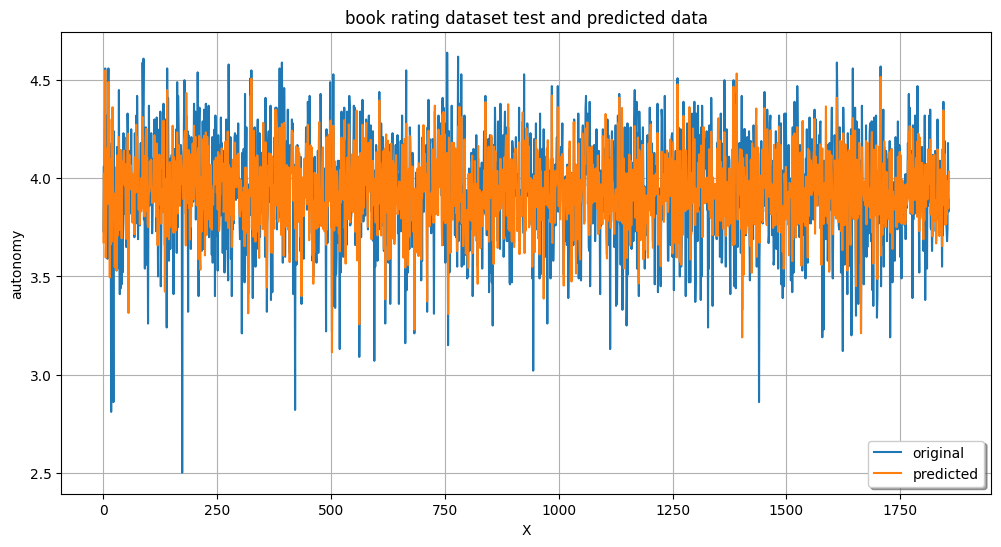

In [44]:
import matplotlib.pyplot as plt
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("book rating dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('autonomy')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()
